## ✅ Efeito das condições de expiração dos produtos nas lojas


Neste notebook vamos fazer uma análise de clusters por loja identificando as condições de etiquetagem dos produtos.

## Importar bibliotecas

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # Library for statistical graphics
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.decomposition import PCA  # For dimensionality reduction
from mpl_toolkits.mplot3d import Axes3D  # For 3D visualizations
from sklearn.metrics import silhouette_score  # Imports the Silhouette Score metric, which evaluates the quality of the formed clusters

## Importar o dataset

In [2]:
# Load the Excel data file into a dataframe
df = pd.read_excel('merged_data.xlsx')

# Display the first rows of the dataframe
df.head()

,idstore,district,selling_square_ft,type,sku,brand,oldpvp,new_pvp,discount,discount%interval,...,profit (€),perc_expiring_sku,perc_interval,expiring_date,labelling_date,sell_date,expiring_days,period_sell_vs_labelling,period_expiring_vs_labelling,sold
0,1,Évora,4762,Large,1,marca1,4.22,2.11,0.5,[40 - 60%[,...,0.3376,0.010050,[0 - 10%[,2021-10-03,2021-10-01,2021-10-02,199,1.0,2,True
1,1,Évora,4762,Large,1,marca1,3.96,1.98,0.5,[40 - 60%[,...,0.3168,0.005025,[0 - 10%[,2021-10-02,2021-10-01,NaT,199,NaN,1,False
2,1,Évora,4762,Large,1,marca1,4.74,2.37,0.5,[40 - 60%[,...,0.3792,0.010050,[0 - 10%[,2021-10-03,2021-10-01,2021-10-03,199,2.0,2,True
3,1,Évora,4762,Large,1,marca1,4.20,2.10,0.5,[40 - 60%[,...,0.3360,0.010050,[0 - 10%[,2021-10-03,2021-10-01,2021-10-02,199,1.0,2,True
4,1,Évora,4762,Large,1,marca1,4.62,2.31,0.5,[40 - 60%[,...,0.3696,0.010050,[0 - 10%[,2021-10-03,2021-10-01,2021-10-03,199,2.0,2,True


## Calculo de métricas

### Média de desconto por loja

In [3]:
# Calculate the average discount per store
mean_discount_per_store = df.groupby('idstore')['discount'].mean().reset_index()

# Rename the column to indicate it is the average discount
mean_discount_per_store.rename(columns={'discount': 'mean_discount'}, inplace=True)

# Display the result
print(mean_discount_per_store)

     idstore  mean_discount
0          1       0.342578
1          2       0.324714
2          3       0.301029
3          4       0.305130
4          5       0.301619
..       ...            ...
326      328       0.500000
327      329       0.300000
328      330       0.300000
329      331       0.300000
330      332       0.500000

[331 rows x 2 columns]


### Média de percentagem de expiração de produtos por loja

In [4]:
# Calculate the average perc_expiring_sku per store
mean_perc_expiring_sku_per_store = df.groupby('idstore')['perc_expiring_sku'].mean().reset_index()

# Rename the column to indicate it is the average perc_expiring_sku
mean_perc_expiring_sku_per_store.rename(columns={'perc_expiring_sku': 'mean_perc_expiring_sku'}, inplace=True)

# Display the result
print(mean_perc_expiring_sku_per_store)

     idstore  mean_perc_expiring_sku
0          1                0.446587
1          2                0.374760
2          3                0.346032
3          4                0.196993
4          5                0.363834
..       ...                     ...
326      328                0.053030
327      329                0.333333
328      330                0.200000
329      331                0.333333
330      332                0.028926

[331 rows x 2 columns]


### Média de dias de validade do produto por loja

In [5]:
# Calculate the average expiring_days per store
mean_expiring_days_per_store = df.groupby('idstore')['expiring_days'].mean().reset_index()

# Rename the column to indicate it is the average expiring_days
mean_expiring_days_per_store.rename(columns={'expiring_days': 'mean_expiring_days'}, inplace=True)

# Display the result
print(mean_expiring_days_per_store)

     idstore  mean_expiring_days
0          1           10.268191
1          2           17.524407
2          3            4.062857
3          4           10.699134
4          5            4.296980
..       ...                 ...
326      328          132.000000
327      329            3.000000
328      330            5.000000
329      331            3.000000
330      332          242.000000

[331 rows x 2 columns]


## Gerar um novo dataframe com as métricas calculadas

In [6]:
# Merge the calculated metrics into a new dataframe
merged_metrics = mean_perc_expiring_sku_per_store.merge(mean_expiring_days_per_store, on='idstore')
merged_metrics = merged_metrics.merge(mean_discount_per_store, on='idstore')

# Display the new dataframe
print(merged_metrics)

     idstore  mean_perc_expiring_sku  mean_expiring_days  mean_discount
0          1                0.446587           10.268191       0.342578
1          2                0.374760           17.524407       0.324714
2          3                0.346032            4.062857       0.301029
3          4                0.196993           10.699134       0.305130
4          5                0.363834            4.296980       0.301619
..       ...                     ...                 ...            ...
326      328                0.053030          132.000000       0.500000
327      329                0.333333            3.000000       0.300000
328      330                0.200000            5.000000       0.300000
329      331                0.333333            3.000000       0.300000
330      332                0.028926          242.000000       0.500000

[331 rows x 4 columns]


In [7]:
# Check if the dataset has null values
null_values = merged_metrics.isnull().sum()
print(null_values)

idstore                   0
mean_perc_expiring_sku    0
mean_expiring_days        0
mean_discount             0
dtype: int64


## Modelo K-means clustering

### Normalização dos dados e método do cotovelo para encontrar o número ideal de clusters

In [8]:
# Remove the idstore column
X = merged_metrics.drop(columns=['idstore'])
X

,mean_perc_expiring_sku,mean_expiring_days,mean_discount
0,0.446587,10.268191,0.342578
1,0.374760,17.524407,0.324714
2,0.346032,4.062857,0.301029
3,0.196993,10.699134,0.305130
4,0.363834,4.296980,0.301619
...,...,...,...
326,0.053030,132.000000,0.500000
327,0.333333,3.000000,0.300000
328,0.200000,5.000000,0.300000
329,0.333333,3.000000,0.300000


In [9]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\joaov\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\joaov\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


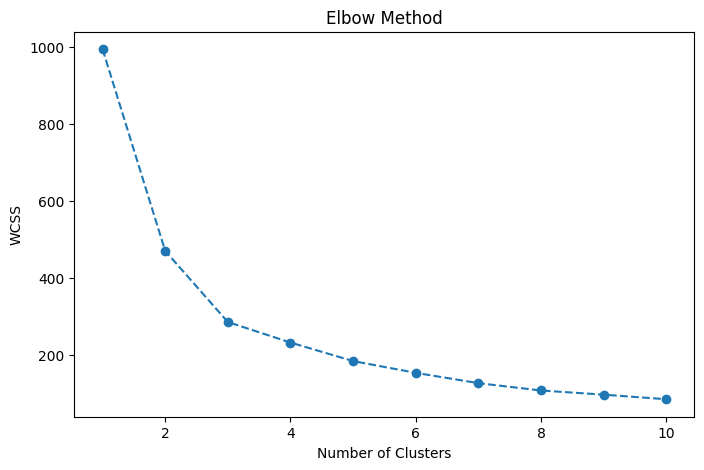

In [10]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

### Resultado do modelo com 3 clusters

In [11]:
# Define the number of clusters
n_clusters = 3

# Create the KMeans model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans_model.fit(X_scaled)

# Display the cluster centroids
print("Cluster centroids:")
print(kmeans_model.cluster_centers_)

Cluster centroids:
[[ 0.4234134  -0.1905484  -0.0924785 ]
 [-2.611871    5.46754845  5.2128491 ]
 [-1.4760548   0.10136547 -0.2864496 ]]


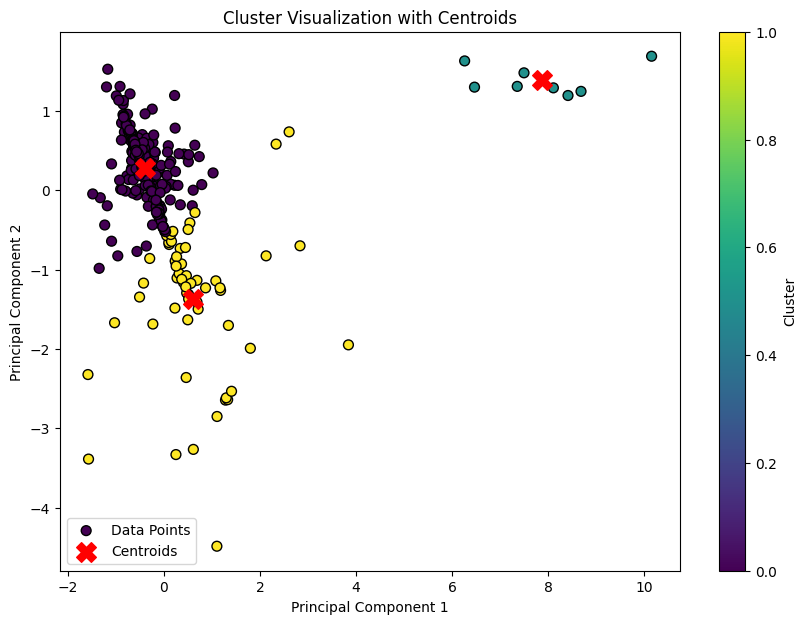

In [12]:
# Apply PCA to reduce the dimensionality to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Transform the scaled data to the new reduced space

# Get the cluster labels assigned by the K-Means model
labels = kmeans_model.labels_

# Create the figure to visualize the clusters
plt.figure(figsize=(10, 7))

# Plot the data points in the 2D space reduced by PCA, colored by cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, marker='o', edgecolor='k', s=50, label='Data Points')

# Get the coordinates of the centroids in the original space
centroids = kmeans_model.cluster_centers_

# Transform the centroids to the new reduced space by PCA
centroids_pca = pca.transform(centroids)

# Plot the centroids on the graph, representing them with a different marker (X) and red color
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add title and axis labels to the plot
plt.title('Cluster Visualization with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend for better interpretation
plt.legend()

# Add a color bar to indicate the clusters
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

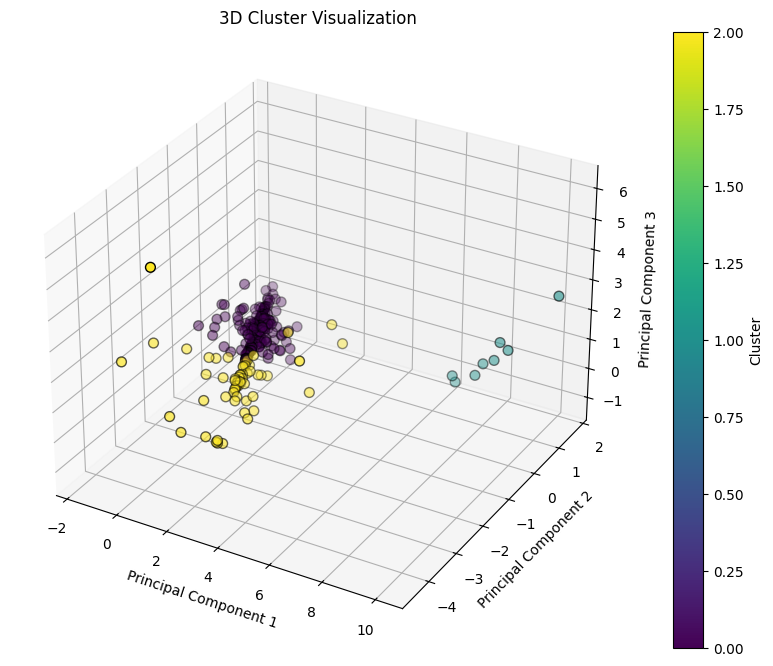

In [13]:
# Reduce the dimensionality of the data to 3 principal components using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)  # Transform the scaled data to the new 3D reduced space

# Create a figure for 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot the data points in the three-dimensional space, coloring them according to the clusters
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)

# Add title and axis labels
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar to indicate the clusters
fig.colorbar(scatter, ax=ax, label='Cluster')

# Display the plot
plt.show()

In [14]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5831762046326989


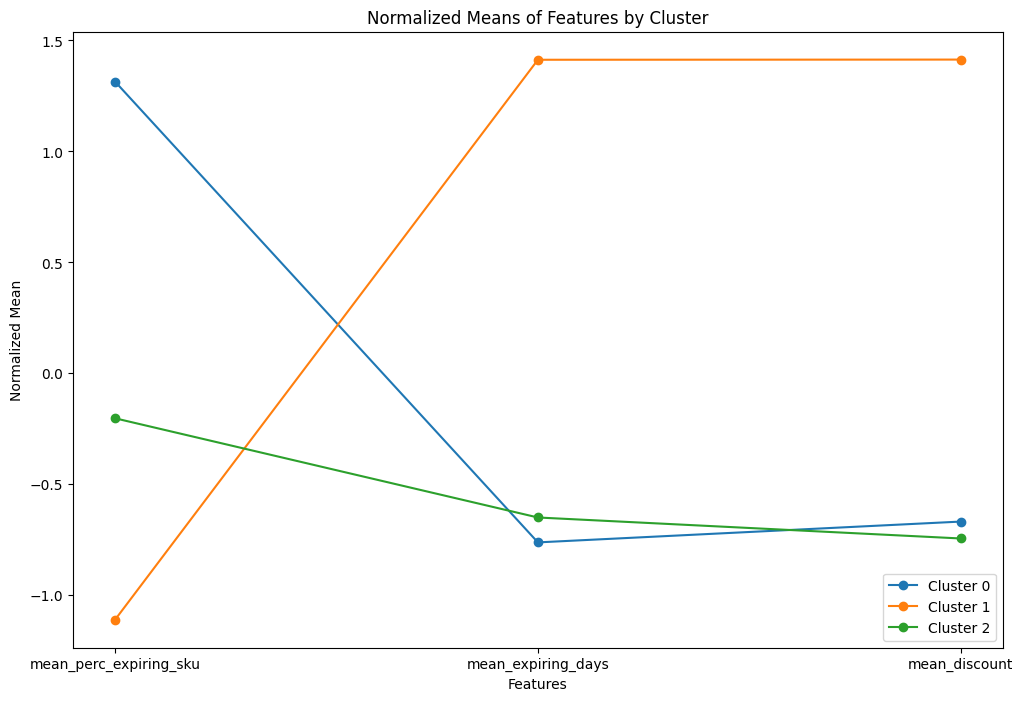

In [15]:
# Define the features to be analyzed and plotted
features_to_plot = ['mean_perc_expiring_sku', 'mean_expiring_days', 'mean_discount']

# Calculate the mean of the features for each cluster
cluster_means = merged_metrics.copy()  # Create a copy of the original DataFrame
cluster_means['Cluster'] = labels  # Add the cluster labels to the DataFrame
cluster_means = cluster_means.groupby('Cluster').mean().reset_index()  # Group by cluster and calculate the mean of the variables

# Normalize the data to allow fair comparisons between the variables
scaler = StandardScaler()
cluster_means_normalized = pd.DataFrame(scaler.fit_transform(cluster_means[features_to_plot]), 
                                        columns=features_to_plot)  # Normalize only the selected columns

# Add the cluster column to the normalized DataFrame to maintain the association
cluster_means_normalized['Cluster'] = cluster_means['Cluster'].values

# Create the figure for the line plot
plt.figure(figsize=(12, 8))

# Iterate over each cluster and plot the corresponding line
for cluster in cluster_means_normalized['Cluster']:
    plt.plot(features_to_plot, 
             cluster_means_normalized[cluster_means_normalized['Cluster'] == cluster].iloc[0][features_to_plot], 
             marker='o', label=f'Cluster {cluster}')  # Add markers and labels for each cluster

# Add title and axis labels
plt.title('Normalized Means of Features by Cluster')
plt.xlabel('Features')
plt.ylabel('Normalized Mean')

# Add a legend for better interpretation
plt.legend()

# Remove the background grid for a cleaner look
plt.grid(False)

# Display the plot
plt.show()

In [16]:
# Count the number of stores per cluster
stores_per_cluster = pd.Series(labels).value_counts().sort_index()

# Display the result
print(stores_per_cluster)

0    262
1      8
2     61
Name: count, dtype: int64
